In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("processed_database_2.csv")

X = df.iloc[:, 1:]
Y = df.iloc[:, :1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [3]:
model = Sequential()
model.add(Dense(30, activation="relu", input_dim=15))
model.add(Dense(30, activation="relu"))
model.add(Dense(1, activation="linear"))

model.compile(loss="mean_squared_error", metrics=["mae"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                480       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


In [4]:
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=10)

Epoch 1/10
11734/11734 [==============================] - 6s 513us/step - loss: 211.5319 - mae: 11.1518 - val_loss: 191.2985 - val_mae: 10.6279
Epoch 2/10
11734/11734 [==============================] - 6s 501us/step - loss: 189.2010 - mae: 10.5122 - val_loss: 185.8264 - val_mae: 10.3670
Epoch 3/10
11734/11734 [==============================] - 6s 509us/step - loss: 185.3103 - mae: 10.3390 - val_loss: 183.5623 - val_mae: 10.2721
Epoch 4/10
11734/11734 [==============================] - 6s 499us/step - loss: 183.6530 - mae: 10.2651 - val_loss: 182.3353 - val_mae: 10.2297
Epoch 5/10
11734/11734 [==============================] - 6s 504us/step - loss: 182.8373 - mae: 10.2274 - val_loss: 181.9906 - val_mae: 10.2205
Epoch 6/10
11734/11734 [==============================] - 6s 495us/step - loss: 182.3698 - mae: 10.2069 - val_loss: 182.4331 - val_mae: 10.1278
Epoch 7/10
11734/11734 [==============================] - 6s 493us/step - loss: 181.9979 - mae: 10.1904 - val_loss: 181.6491 - val_mae: 

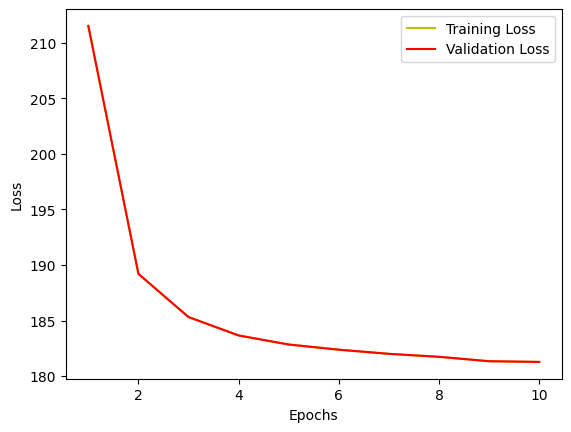

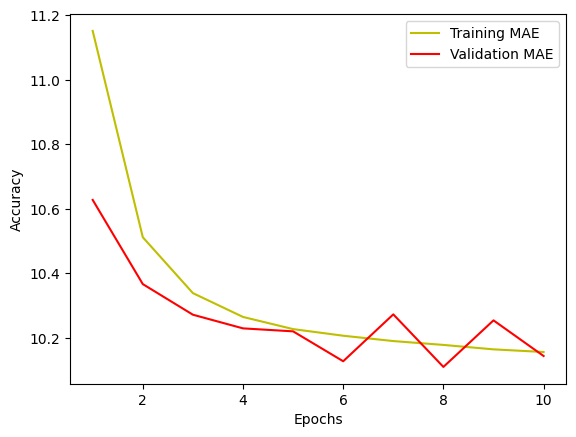

In [5]:
loss = history.history["loss"]
val_loss = history.history["loss"]
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, "y", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()

mae = history.history["mae"]
val_mae = history.history["val_mae"]
plt.plot(epochs, mae, "y", label="Training MAE")
plt.plot(epochs, val_mae, "r", label="Validation MAE")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()